In [48]:
# https://www.tensorflow.org/tutorials/keras/regression

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import os

from ttictoc import TicToc


In [71]:
column_names = ['fileId', 'row','rising_idx','falling_idx','volume','rising_weight',
                'falling_weight', 'first_val', 'last_val', 'delay']
t = TicToc() ## TicToc("name")
t.tic()

raw_dataset = pd.read_csv('./processed.csv', names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)
t.toc()
print('loaded dataset')
print(t.elapsed)

t.tic()
raw_dataset.to_feather('processed.feather')
t.toc()
print('stored dataset')
print(t.elapsed)




loaded dataset
15.682873010635376
stored dataset
1.7465035915374756


In [74]:
raw_dataset =  pd.read_feather('./processed.feather')

In [75]:
def filterBad(dataset):
    initial_len = len(dataset)
    dataset = dataset[(dataset['rising_idx'] != 0)]
    dataset = dataset[(dataset['falling_idx'] != 0)]
    dataset = dataset[(dataset['volume'] > 500)]
#     dataset = dataset[(dataset['first_val'] < 30)]
#     dataset = dataset[(dataset['last_val'] < 30)]
    final_len = len(dataset)
    print('Rejected %d points (%f%%)' % ((initial_len-final_len), (initial_len-final_len)/initial_len))
    return dataset
    
raw_dataset = filterBad(raw_dataset)


Rejected 5346088 points (0.490439%)


In [76]:

inspect = raw_dataset[(raw_dataset['rising_idx'] < 1000) & (raw_dataset['delay'] < -5000)]
print(inspect)

          fileId  row  rising_idx  falling_idx  volume  rising_weight  \
66958        604   76         452          809     708       0.499798   
66976        604   94         334          925     595       0.499798   
1219221    11181  100         838          928     534       0.750531   
1823923    16727   70         372          986     612       0.499933   
3077526    28230   64         333          987     664       0.499798   
3077568    28230  106         333          987     664       0.499798   
3324932    30496   40         960          991     523       1.756750   
3324956    30496   64         783          993    1011       0.668632   
3324986    30496   94         584          987     767       0.499798   
3324992    30496  100         539          988     882       0.499798   
3995960    36656   64         452          868     852       0.499798   
3996002    36656  106         494          866     728       0.499798   
4192504    38457   81         333          988     

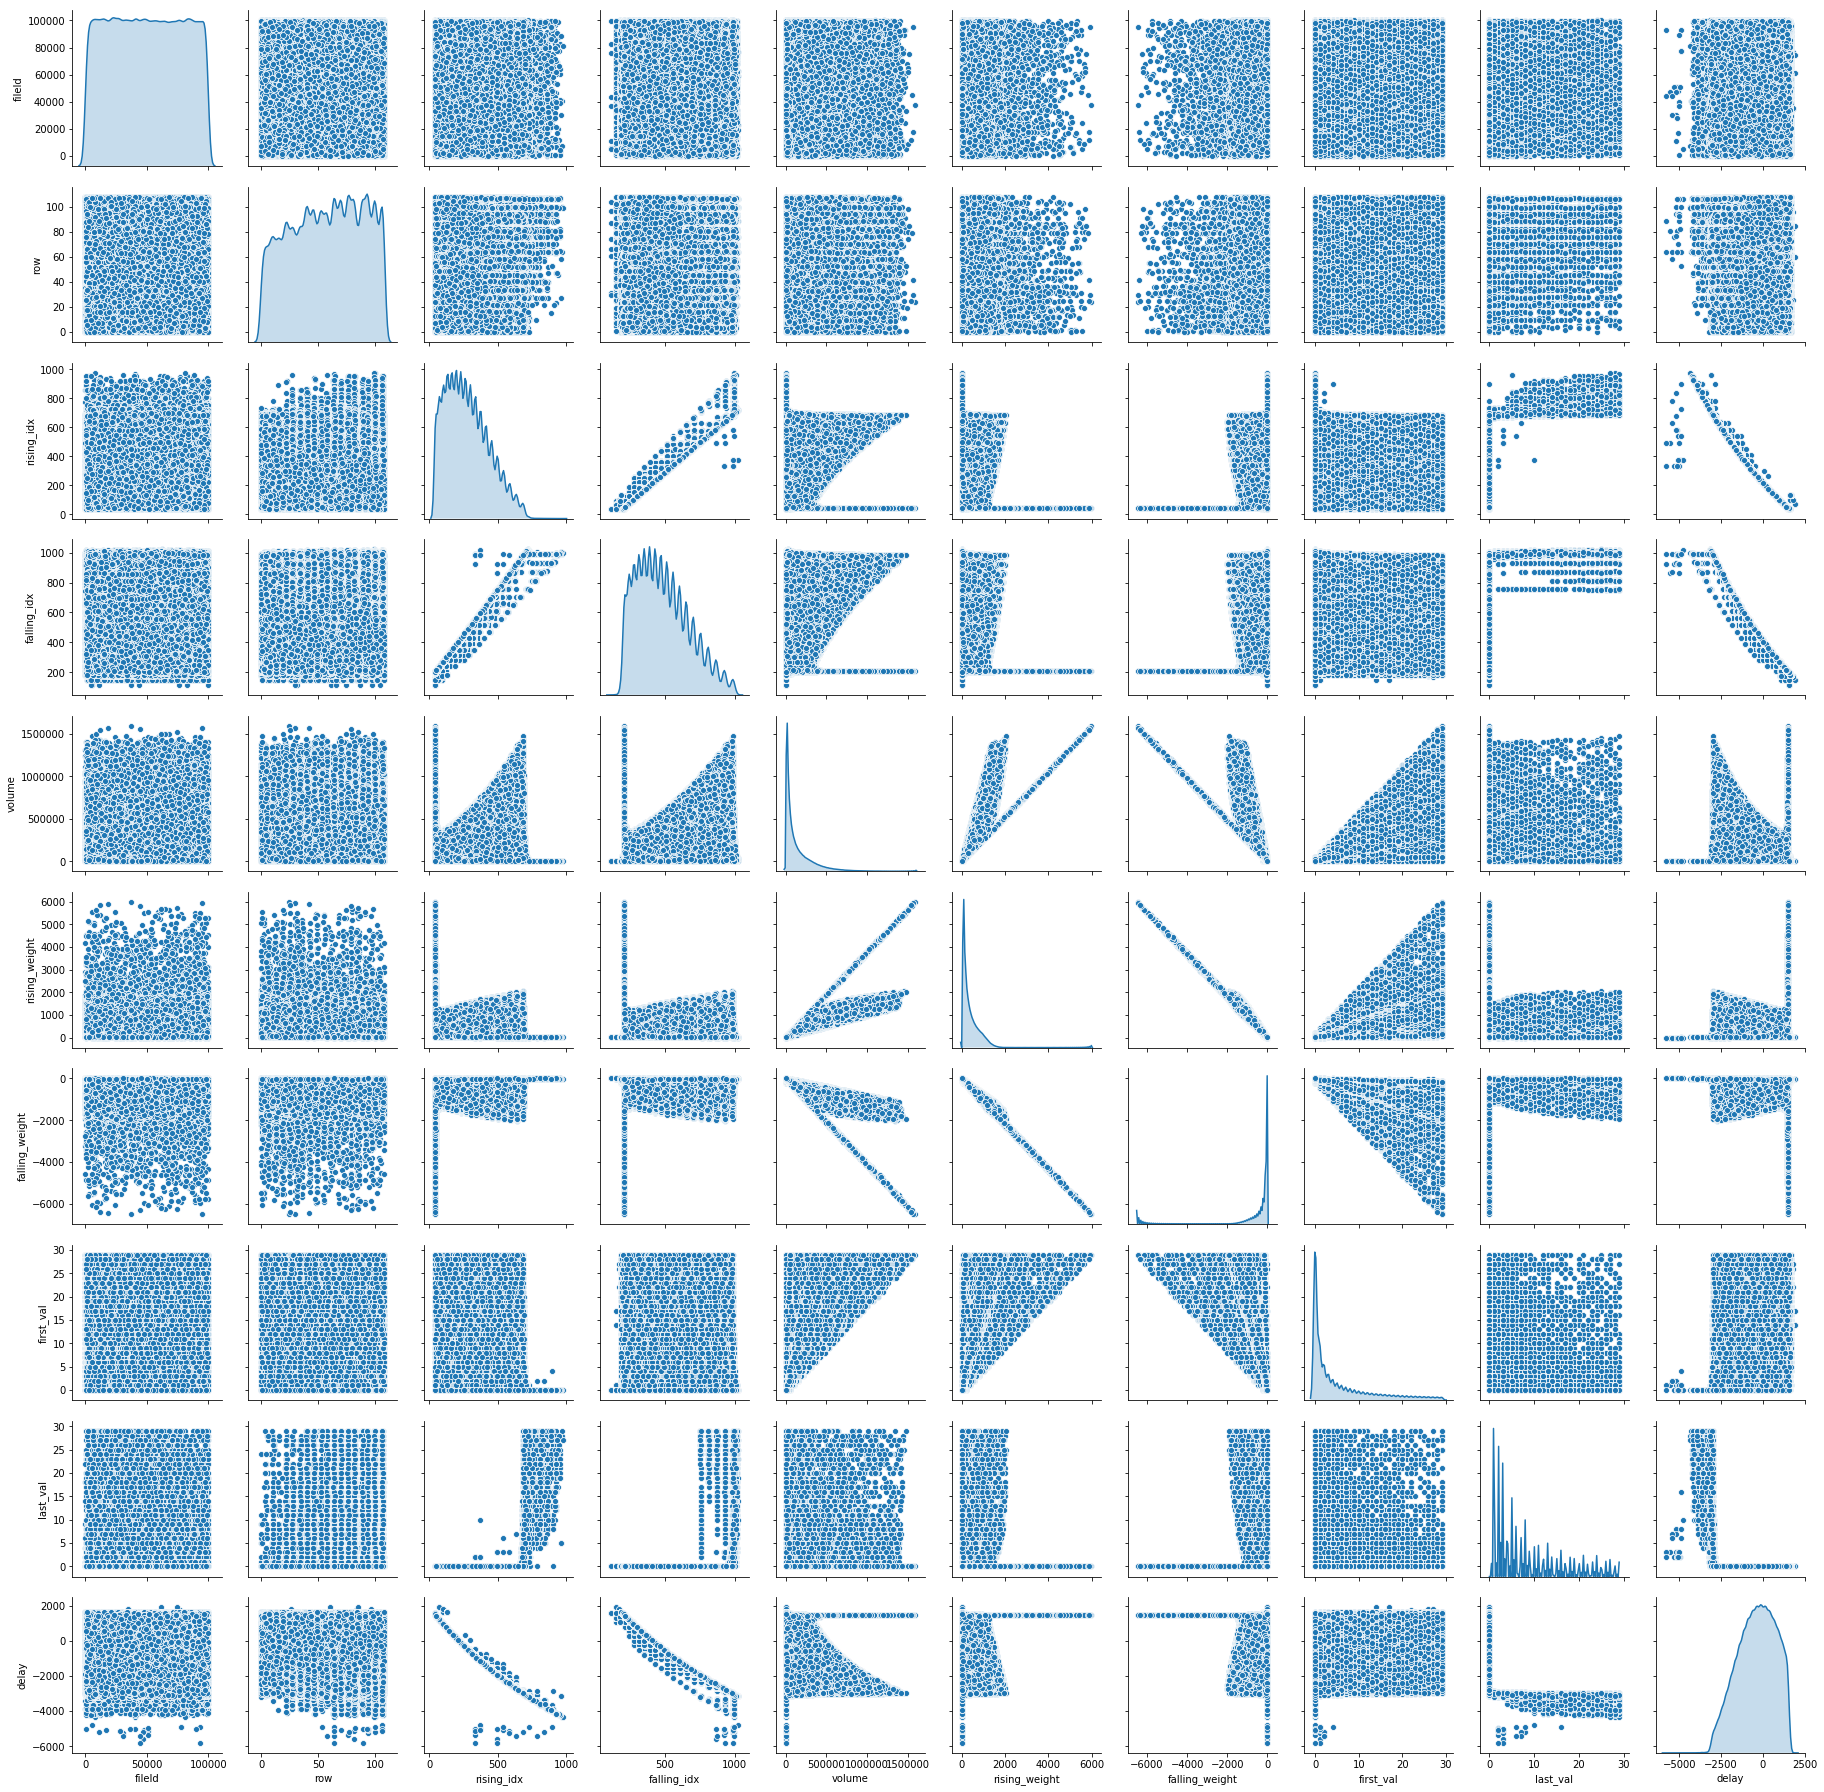

In [79]:
visualize_dataset = raw_dataset.sample(frac=0.3 )
sns.pairplot(visualize_dataset[column_names], diag_kind="kde")

In [68]:
def loadAndFilter():
    raw_dataset =  pd.read_feather('../preprocessing/processed.feather')
    dataset = filterBad(raw_dataset)
    visualize_dataset = dataset.sample(frac=0.01)
    sns.pairplot(visualize_dataset[["row", "rising_idx", "falling_idx", "volume", "rising_weight", "falling_weight", "delay"]], diag_kind="kde")
    return dataset